# TASK 4: SALES PREDICTION USING PYTHON

## Introduction

Sales prediction involves forecasting the sales of a product or service based on various factors such as advertising expenditure on TV, radio, and newspapers. Machine learning models can help businesses make informed decisions about their marketing strategies by predicting the expected sales.

In this task, we will use Python and machine learning techniques to predict sales. We will explore the data, preprocess it, and build models using Scikit-learn, a popular machine learning library in Python.

## Libraries Required

In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sb
import matplotlib.pyplot as plt


## Data Loading


In [57]:
# Load the dataset
data = pd.read_csv("advertising.csv")

## Data Analysis

In [58]:
# Display the first few entries in the dataset
data.head()

# Display information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## Data Exploration

In [59]:
# Define the shape of the dataset
data.shape

# Check for missing values
data.isnull().sum()

# Display dataset columns
data.columns

# Display last 6 entries in the dataset
data.tail(6)

# Describe the dataset
data.describe()


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Data Preprocessing

No missing values in this dataset, so no need to handle missing values.

## Data Exploration (Continued)

In [60]:
# Training Dataset
print("Maximum TV Advertising Spend: ", data['TV'].max())
print("Minimum TV Advertising Spend: ", data['TV'].min())
print("Maximum Radio Advertising Spend: ", data['Radio'].max())
print("Minimum Radio Advertising Spend: ", data['Radio'].min())
print("Maximum Newspaper Advertising Spend: ", data['Newspaper'].max())
print("Minimum Newspaper Advertising Spend: ", data['Newspaper'].min())
print("Maximum Sales: ", data['Sales'].max())
print("Minimum Sales: ", data['Sales'].min())

# Grouping data (if applicable)
spec = data.groupby("Sales")
spec.count()


Maximum TV Advertising Spend:  296.4
Minimum TV Advertising Spend:  0.7
Maximum Radio Advertising Spend:  49.6
Minimum Radio Advertising Spend:  0.0
Maximum Newspaper Advertising Spend:  114.0
Minimum Newspaper Advertising Spend:  0.3
Maximum Sales:  27.0
Minimum Sales:  1.6


,TV,Radio,Newspaper
Sales,,,
1.6,1,1,1
3.2,1,1,1
4.8,1,1,1
5.3,2,2,2
5.5,1,1,1
...,...,...,...
24.7,1,1,1
25.4,3,3,3
25.5,1,1,1


## Data Visualization

### Histogram for Advertising Dataset

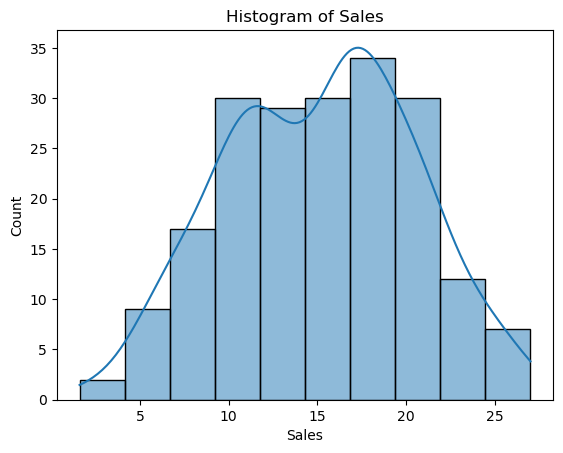

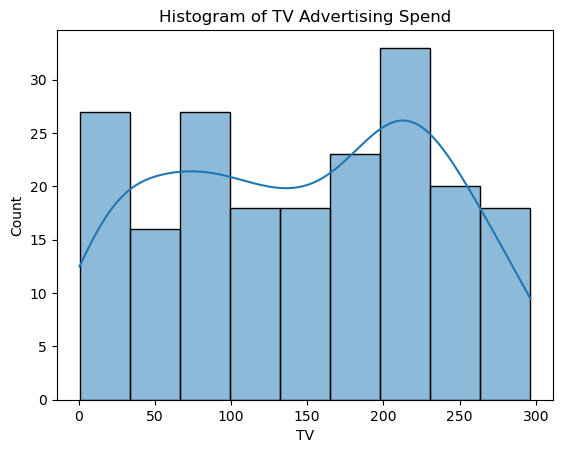

In [61]:
# Histogram for Advertising Dataset
sb.histplot(data=data, x='Sales', kde=True)
plt.title('Histogram of Sales')
plt.show()

sb.histplot(data=data, x='TV', kde=True)
plt.title('Histogram of TV Advertising Spend')
plt.show()

### PairPlot for Advertising Dataset

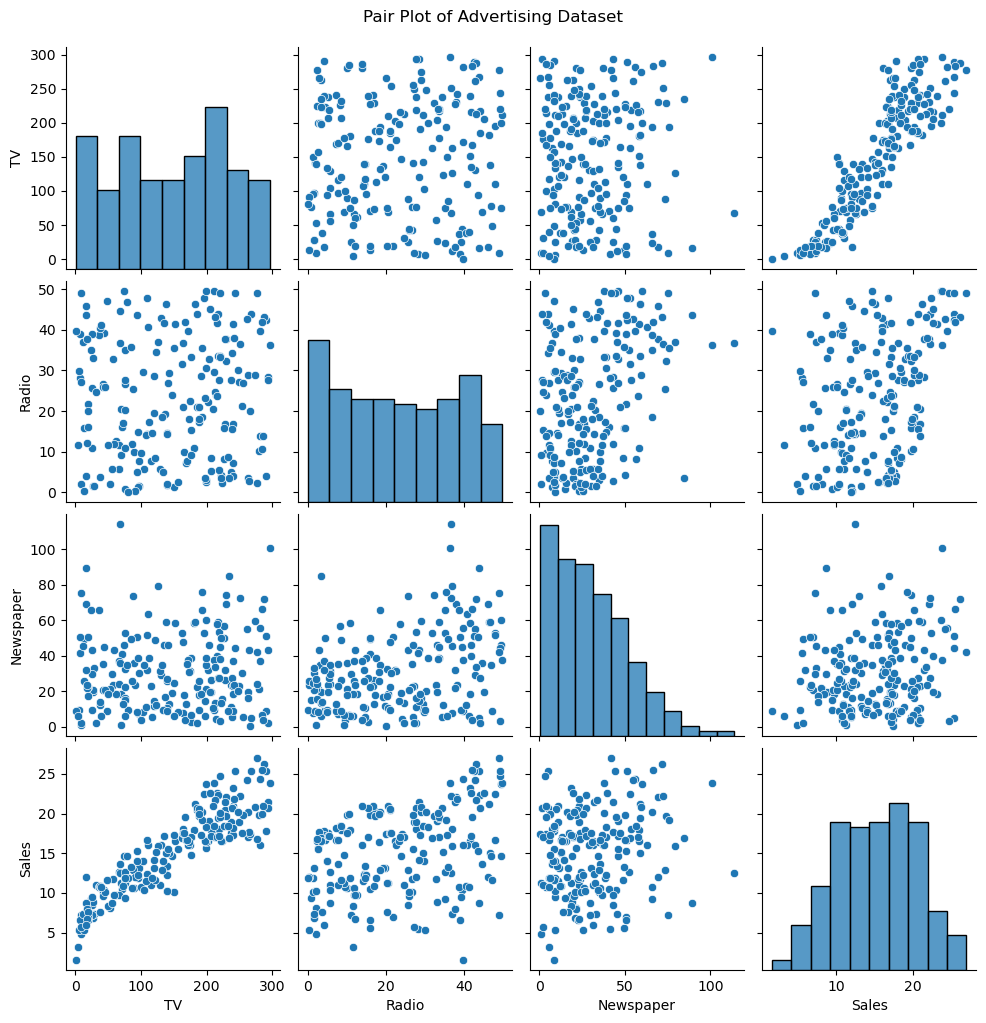

In [62]:
# PairPlot for Advertising Dataset
sb.pairplot(data, markers=['o', 's'])
plt.suptitle('Pair Plot of Advertising Dataset', y=1.02)
plt.show()

### Correlation Heatmap

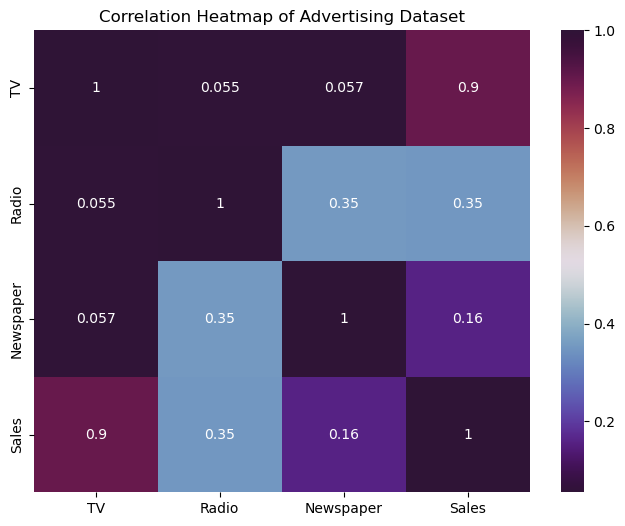

In [63]:
# Correlation matrix heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = data.corr()
sb.heatmap(correlation_matrix, annot=True, cmap='twilight_shifted')
plt.title('Correlation Heatmap of Advertising Dataset')
plt.show()

### Violin Plot

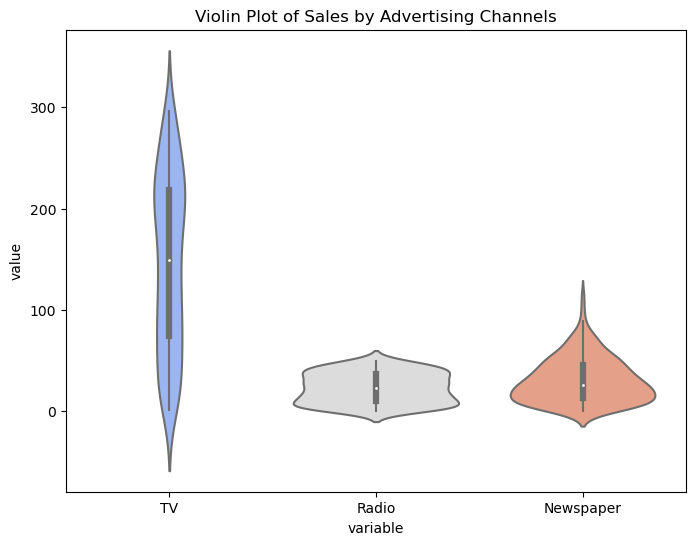

In [64]:
# Violin Plot for Sales by Advertising Channel
plt.figure(figsize=(8, 6))
sb.violinplot(x='variable', y='value', data=pd.melt(data, ['Sales']), palette='coolwarm')
plt.title('Violin Plot of Sales by Advertising Channels')
plt.show()


## Data Splitting with Training and Testing

In [65]:
# Features and target variable
x = data[['TV', 'Radio', 'Newspaper']]  # Features
y = data['Sales']  # Target

# Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


## Model Training and Evaluation

### Random Forest Regressor

In [66]:
rf = RandomForestRegressor()  # Initialize the Random Forest Regressor
rf.fit(x_train, y_train)  # Train the model
rf_pred = rf.predict(x_test)  # Make predictions on the test set

# Evaluate the model
mse_rf = mean_squared_error(y_test, rf_pred)
r2_rf = r2_score(y_test, rf_pred)

print("Random Forest Mean Squared Error:", mse_rf)
print("Random Forest R^2 Score:", r2_rf)


Random Forest Mean Squared Error: 1.9339077250000034
Random Forest R^2 Score: 0.9420605808898648


### Decision Tree Regressor

In [67]:
dt = DecisionTreeRegressor()  # Initialize the Decision Tree Regressor
dt.fit(x_train, y_train)  # Train the model
dt_pred = dt.predict(x_test)  # Make predictions on the test set

# Evaluate the model
mse_dt = mean_squared_error(y_test, dt_pred)
r2_dt = r2_score(y_test, dt_pred)

print("Decision Tree Mean Squared Error:", mse_dt)
print("Decision Tree R^2 Score:", r2_dt)


Decision Tree Mean Squared Error: 4.32175
Decision Tree R^2 Score: 0.8705213897735342


### Linear Regression

In [68]:
lr = LinearRegression()  # Initialize Linear Regression
lr.fit(x_train, y_train)  # Train the model
lr_pred = lr.predict(x_test)  # Make predictions on the test set

# Evaluate the model
mse_lr = mean_squared_error(y_test, lr_pred)
r2_lr = r2_score(y_test, lr_pred)

print("Linear Regression Mean Squared Error:", mse_lr)
print("Linear Regression R^2 Score:", r2_lr)


Linear Regression Mean Squared Error: 4.522552562041286
Linear Regression R^2 Score: 0.8645053923967726


## Testing and Prediction of Sales

In [69]:
print("Welcome to the Sales Prediction Input!")

# Get user input for TV, Radio, and Newspaper advertising spends
tv = float(input("Enter TV Advertising Spend: "))
radio = float(input("Enter Radio Advertising Spend: "))
newspaper = float(input("Enter Newspaper Advertising Spend: "))

print("\nYou entered the following values:")
print(f"TV: {tv}")
print(f"Radio: {radio}")
print(f"Newspaper: {newspaper}")

prediction = np.array([[tv, radio, newspaper]])  # Prepare input for prediction
print("Predicted Sales:", lr.predict(prediction))  # Using the linear regression model for prediction

Welcome to the Sales Prediction Input!
Enter TV Advertising Spend: 120.2
Enter Radio Advertising Spend: 19.6
Enter Newspaper Advertising Spend: 11.6

You entered the following values:
TV: 120.2
Radio: 19.6
Newspaper: 11.6
Predicted Sales: [13.37072678]


## Conclusion

In conclusion, the sales prediction task demonstrates the application of machine learning techniques to predict sales based on advertising spend across different channels. By using models like Random Forest, Decision Tree, and Linear Regression, we can create models capable of making accurate predictions on unseen data. This task highlights the importance of data preprocessing, visualization, and model evaluation in building reliable machine learning models.